# BANA7038 Data Analysis Methods Homework1

### 1. Import the CSV file ‘car_r.csv’ using the function “read.table()” or “read.csv()”. Where to find the instruction on how to use the functions?

### *Answer:*
I use the following command to import the 'car_r.csv' file. The instruction about the functions can be found __[here](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Reading-data-from-files)__.

In [1]:
data <- read.csv('car_r.csv')
head(data)

brand,mileage,num_accidents,num_passengers,speed_car,speed_air,height,width,ABS
Ford,36696.57,2,6,59.26462,-3.28547256,7.938580,6.069673,TRUE
Toyota,20618.62,2,14,38.21588,-2.79019074,5.997753,6.170255,TRUE
Ford,21003.26,2,8,39.18807,-0.26558119,7.857335,6.777170,FALSE
GM,NA,0,5,36.38138,-1.35033786,5.691600,5.848215,TRUE
Ford,27488.80,3,6,49.22647,-0.06738388,6.050838,6.389353,FALSE
Ford,NA,0,10,60.68898,-0.92135848,4.435193,5.711845,FALSE


As we can see, the 'car_r.csv' file has been imported into the r dataframe.

### 2. How many variables in the data set? What are their names?
### *Answer:*
I use the following code to display the number of variables and their names.

In [2]:
ncol(data)

[1] 9

In [3]:
colnames(data)

[1] "brand"          "mileage"        "num_accidents"  "num_passengers"
[5] "speed_car"      "speed_air"      "height"         "width"         
[9] "ABS"

As we can see, there are 9 variables in total and they are listed above.

### 3. How many observations in total? How many observations for Ford?
### *Answer:*
I use the following code to display the number of observations in total and for Ford.

In [4]:
nrow(data)

[1] 500

In [5]:
nrow(data[data$brand == 'Ford',])

[1] 275

As we can see, there are 500 observations in total and 275 of them are Ford.

### 4. Calculate the mean for each of the car parameters (measures).  Please also report the corresponding standard deviation.
### *Answer:*
I use the following code to calculate the mean and corresponding standard deviation of the car parameters. Before calculation, I need to replace all the NA with 0 to avoid 

In [6]:
for (i in seq(2,8,1)){
    print(paste0('The mean of ', colnames(data)[i], ' is ', mean(data[,i], na.rm = TRUE)))
    print(paste0('The standard deviation of ', colnames(data)[i], ' is ', sd(data[,i], na.rm = TRUE)))
}

[1] "The mean of mileage is 39564.6303933777"
[1] "The standard deviation of mileage is 10819.6808150253"
[1] "The mean of num_accidents is 2.154"
[1] "The standard deviation of num_accidents is 1.42349452873789"
[1] "The mean of num_passengers is 6.69"
[1] "The standard deviation of num_passengers is 3.74298274637746"
[1] "The mean of speed_car is 50.0596379479958"
[1] "The standard deviation of speed_car is 9.77354044283966"
[1] "The mean of speed_air is 0.245481955524192"
[1] "The standard deviation of speed_air is 3.08435340345378"
[1] "The mean of height is 5.91416373436564"
[1] "The standard deviation of height is 1.0548824699477"
[1] "The mean of width is 6.01366743910377"
[1] "The standard deviation of width is 0.471457196975971"


As we can see the mean and standard deviation of car parameters are shown above.

### 5. Obtain the histogram for each of the car parameters. 
### *Answer:*
I use the following code to generate the histogram. I use na,omit() function here to omit all the NAs when plotting each car parameter.

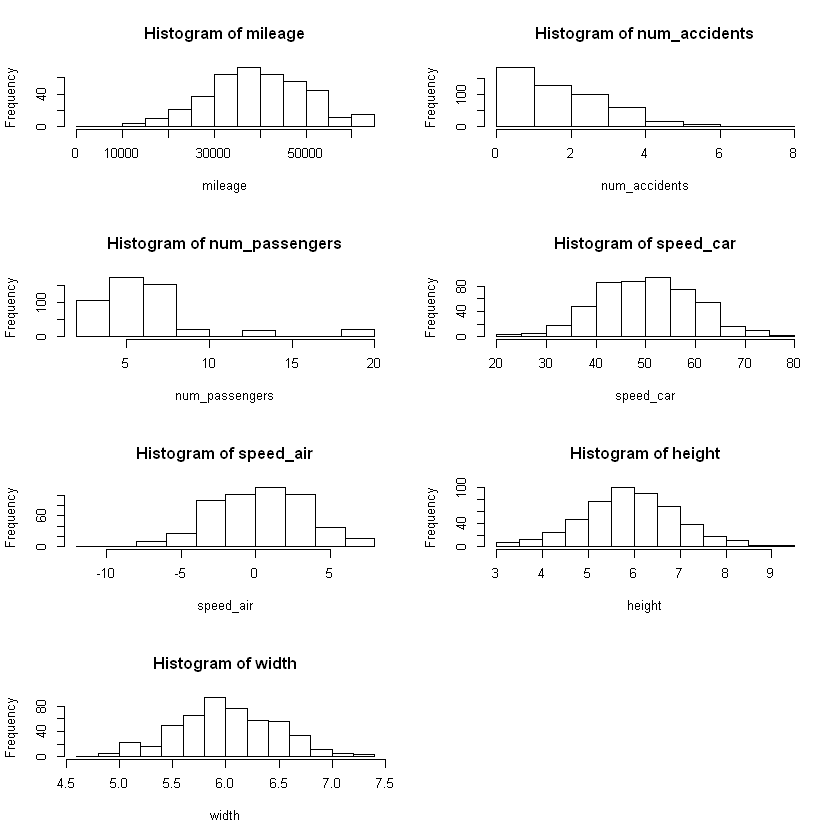

In [20]:
par(mfrow=c(4,2))
for (i in seq(2,8,1)){
    hist(na.omit(data[,i]), main=paste0('Histogram of ', colnames(data)[i]), xlab=colnames(data)[i])
}

The histograms of car parameters are shown above.

### 6. Is there any missing value in the data set? If yes, which variable? What is the proportion of missing values?
### *Answer:*
Yes, there are many missing values in the dataset. I use the following code to get the proportion of missing values for each variable.

In [8]:
colnames(data)[colSums(is.na(data)) > 0]

[1] "mileage"

In [9]:
print(paste0('The proportion of missing values in variable mileage is ', sum(is.na(data$mileage))/nrow(data)))

[1] "The proportion of missing values in variable mileage is 0.2"


As we can see the variable mileage has missing values and the proportion of the missing values is 0.2.

### 7. Calculate the relative speed of the car (defined as = speed_car + speed_air, where speed_car is always positive and speed_air can be positive or negative). What is the average relative speed of the car?
### *Answer:*
I use the following code to calculate the relative speed and put it into the dataframe. 

In [10]:
data$speed_rel = data$speed_car + data$speed_air
head(data)

brand,mileage,num_accidents,num_passengers,speed_car,speed_air,height,width,ABS,speed_rel
Ford,36696.57,2,6,59.26462,-3.28547256,7.938580,6.069673,TRUE,55.97915
Toyota,20618.62,2,14,38.21588,-2.79019074,5.997753,6.170255,TRUE,35.42568
Ford,21003.26,2,8,39.18807,-0.26558119,7.857335,6.777170,FALSE,38.92249
GM,NA,0,5,36.38138,-1.35033786,5.691600,5.848215,TRUE,35.03104
Ford,27488.80,3,6,49.22647,-0.06738388,6.050838,6.389353,FALSE,49.15909
Ford,NA,0,10,60.68898,-0.92135848,4.435193,5.711845,FALSE,59.76762


In [11]:
mean(data$speed_rel)

[1] 50.30512

As we can see the new variable relative speed of the car (speed_rel) has been added into the dataframe. The average relative speed of the car is calculated above.

### 8. How many cars have mileage less than 40000? How many cars have height less than 5?  Please delete those observations (i.e., cars whose mileages are less than 40000 and cars whose heights are less than 5) and delete the observations that contain NAs from the original data set to form a new data set.
### *Answer:*
I use the following code to find the number of cars that have mileage less than 40000.

In [12]:
sum(data$mileage<40000, na.rm=TRUE)

[1] 210

I use the following code to find the number of cars that have height less than 5.

In [13]:
sum(data$height<5)

[1] 93

I use the following code to remove observations that have NAs or whose mileages are less than 40000 or heights are less than 5.

In [14]:
new_df <- na.omit(data[!(data$mileage<40000 | data$height<5),])
head(new_df)
print(paste0('The number of rows the new dataset has is ', nrow(new_df)))

,brand,mileage,num_accidents,num_passengers,speed_car,speed_air,height,width,ABS,speed_rel
11,Toyota,49008.35,0,2,45.18036,-4.85664137,6.245903,5.940920,TRUE,40.32372
12,Ford,52222.57,1,5,72.62542,0.09318688,6.188253,6.942762,FALSE,72.71861
15,Toyota,50384.01,3,20,57.03688,-1.78872301,6.891695,6.628630,FALSE,55.24816
16,Ford,44077.83,3,10,70.06473,-2.21176771,6.643067,5.792547,TRUE,67.85296
18,Toyota,54543.53,1,10,33.61887,-1.97128075,6.022424,6.007553,TRUE,31.64759
19,Ford,44982.11,1,5,63.39089,-5.84904163,6.141426,6.279825,FALSE,57.54185


[1] "The number of rows the new dataset has is 158"


As we can see there are 210 cars have mileages less than 40000, 93 cars have heights less than 5. After removing certain observations by request, the new dataset has 158 observations.

### 9. Divide the new data set (as obtained in Step 8) into three subsets: Ford, GM and Toyota.  That is, create three new data sets containing only Ford, GM, and Toyota cars, respectively.
### *Answer:*
I use the following code to divide the new dataset into three subsets based on the brand.

In [15]:
ford <- new_df[new_df$brand=='Ford',]
gm <- new_df[new_df$brand=='GM',]
toyota <- new_df[new_df$brand=='Toyota',]

In [16]:
head(ford)

,brand,mileage,num_accidents,num_passengers,speed_car,speed_air,height,width,ABS,speed_rel
12,Ford,52222.57,1,5,72.62542,0.09318688,6.188253,6.942762,FALSE,72.71861
16,Ford,44077.83,3,10,70.06473,-2.21176771,6.643067,5.792547,TRUE,67.85296
19,Ford,44982.11,1,5,63.39089,-5.84904163,6.141426,6.279825,FALSE,57.54185
20,Ford,47130.67,1,8,50.89936,-0.90499485,6.976452,6.284466,FALSE,49.99437
23,Ford,51598.49,0,14,75.66372,-4.81676432,5.872884,5.825867,FALSE,70.84696
24,Ford,41221.01,2,8,57.49086,0.09653725,6.713137,5.744557,TRUE,57.58740


In [17]:
head(gm)

,brand,mileage,num_accidents,num_passengers,speed_car,speed_air,height,width,ABS,speed_rel
47,GM,51012.22,3,4,31.71405,-0.5771654,5.326909,5.917744,TRUE,31.13688
71,GM,41129.46,1,7,55.32488,-2.8688412,7.675549,6.053806,FALSE,52.45604
90,GM,42332.65,1,6,71.09775,1.7026111,7.265762,5.651175,FALSE,72.80036
128,GM,50068.08,3,5,54.79653,1.6821691,8.516841,6.318204,FALSE,56.47870
138,GM,47962.75,3,20,46.82012,4.6511799,5.464159,6.105387,FALSE,51.47130
165,GM,42393.67,5,8,59.49306,1.6379526,5.786553,6.115461,FALSE,61.13101


In [18]:
head(toyota)

,brand,mileage,num_accidents,num_passengers,speed_car,speed_air,height,width,ABS,speed_rel
11,Toyota,49008.35,0,2,45.18036,-4.856641,6.245903,5.940920,TRUE,40.32372
15,Toyota,50384.01,3,20,57.03688,-1.788723,6.891695,6.628630,FALSE,55.24816
18,Toyota,54543.53,1,10,33.61887,-1.971281,6.022424,6.007553,TRUE,31.64759
28,Toyota,46738.11,1,7,67.75778,6.191012,6.262819,6.345172,FALSE,73.94879
46,Toyota,41185.63,2,8,38.87330,-5.742323,8.275744,6.268487,FALSE,33.13098
58,Toyota,51687.15,2,5,46.66929,-3.482004,7.112445,5.601861,TRUE,43.18729


As we can see from the above, the new dataset has been divided into three subsets based on variable brand. All the mileages are larger than 40000 and all the heights are larger than 5 which also show that the question 8 has been implemented successfully.